In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Cargar el conjunto de datos
beisbol_data = pd.read_csv(r'C:\Users\Diego\OneDrive\Escritorio\DatosEvaluacion\beisbol.csv')

In [4]:
beisbol_data

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762
5,5,New_S.,5600,718
6,6,New_Y.,5518,867
7,7,Milwaukee,5447,721
8,8,Colorado,5544,735
9,9,Houston,5598,615


In [5]:
# Codificar la columna 'equipos' usando one-hot encoding
beisbol_data = pd.get_dummies(beisbol_data, columns=['equipos'], drop_first=True)

In [6]:
# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = beisbol_data.drop('runs', axis=1)
y = beisbol_data['runs']

In [7]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Crear y entrenar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Realizar predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test)

In [10]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

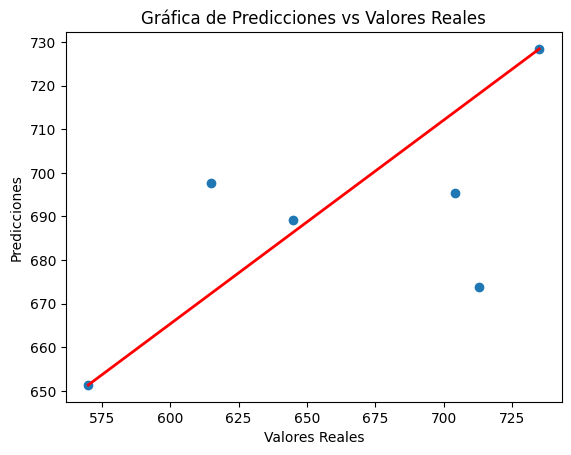

In [11]:
# Crear una gráfica de dispersión y línea de regresión
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de Predicciones vs Valores Reales')
plt.show()

In [12]:
# Interpretar los resultados
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

Error cuadrático medio (MSE): 2846.0684052806587
Coeficiente de determinación (R²): 0.17262780944068212


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [21]:
# Definir una lista de valores de alpha para probar
alpha_values = [0.01, 0.1, 1, 10, 100]

In [22]:
# Crear el objeto de regresión Ridge
ridge_model = Ridge()

In [23]:
# Definir los parámetros para la búsqueda de hiperparámetros
param_grid = {'alpha': alpha_values}

In [24]:
# Crear el objeto GridSearchCV para la búsqueda de hiperparámetros
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')


In [25]:
# Ajustar el modelo con la búsqueda de hiperparámetros en los datos de entrenamiento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [26]:
# Obtener los mejores hiperparámetros y el mejor modelo
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

In [27]:
# Realizar predicciones en el conjunto de prueba usando el mejor modelo
y_pred_best = best_model.predict(X_test)

In [28]:
# Calcular métricas de evaluación para el mejor modelo
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

In [29]:
# Imprimir los resultados
print("Mejor valor de alpha:", best_alpha)
print("Error cuadrático medio (MSE) con el mejor modelo:", mse_best)
print("Coeficiente de determinación (R²) con el mejor modelo:", r2_best)

Mejor valor de alpha: 1
Error cuadrático medio (MSE) con el mejor modelo: 3372.006810536046
Coeficiente de determinación (R²) con el mejor modelo: 0.019733799708504418
